### Load libraries

In [1]:
import pandas as pd
import stop_words
from stop_words import get_stop_words
stop_words = get_stop_words('en')


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
from colormap import rgb2hex

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
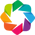

In [6]:
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)

### Read the dataset

In [7]:
ls scripts

 Volume in drive C is Windows
 Volume Serial Number is 620D-D09A

 Directory of C:\Users\vnuretdi\Documents\My Github\Star Wars NLP analysis\scripts

02/07/2020  03:53 PM    <DIR>          .
02/07/2020  03:53 PM    <DIR>          ..
02/07/2020  03:53 PM            79,289 SW_EpisodeIV.txt
02/07/2020  03:53 PM            56,327 SW_EpisodeV.txt
02/07/2020  03:53 PM            48,851 SW_EpisodeVI.txt
               3 File(s)        184,467 bytes
               2 Dir(s)   9,627,361,280 bytes free


In [88]:
df = pd.read_table('scripts/SW_EpisodeIV.txt',
                   delim_whitespace=True, header=0, escapechar='\\')


In [89]:
df.index=list(range(df.shape[0]))

In [91]:
df=pd.read_csv('the new hope.csv').iloc[:,1:]
# df['pos']=pd.Series([eval(x) for x in df['pos']], index=df.index)
# df['senti']=pd.Series([eval(x) for x in df['senti']], index=df.index)
# df['lemma']=pd.Series([eval(x) for x in df['lemma']], index=df.index)
df.head()

character                                           dialogue
0  THREEPIO  Did you hear that?  They've shut down the main...
1  THREEPIO                                      We're doomed!
2  THREEPIO  There'll be no escape for the Princess this time.
3  THREEPIO                                       What's that?
4  THREEPIO  I should have known better than to trust the l...

#### Create the dataframe of characters and corpus for each of the character

In [92]:
characters=set(df.character)

In [93]:
replics = pd.DataFrame(columns=("character", "words"))

In [94]:
for ch in characters:
    x =' '.join(df[df.character==ch].dialogue)    
    replics=replics.append({"character":ch, "words":x}, ignore_index=True )

In [95]:
replics.head()

character  \
0                    DODONNA   
1                   RED NINE   
2                      JABBA   
3  DEATH STAR INTERCOM VOICE   
4                CHIEF PILOT   

                                               words  
0  The battle station is heavily shielded and car...  
1                  Red Nine standing by. It's a hit!  
2  Come on out, Solo! I expected you would be. Ha...  
3  We are approaching the planet Yavin.  The Rebe...  
4                            There goes another one.

#### Create TfId matrix from the characters text. We treat characters's word as one sentence

In [96]:
tfidf_vec = TfidfVectorizer(stop_words='english')

In [97]:
features = tfidf_vec.fit_transform(replics.words)
X = pd.DataFrame(data=features.toarray(), 
                 index=replics.character, 
                 columns=tfidf_vec.get_feature_names())
X.sample(10)

38        aa  aaah  abandoned     abide  ability      able  \
character                                                                     
FIRST TROOPER   0.0  0.000000   0.0        0.0  0.000000      0.0  0.000000   
WOMAN           0.0  0.000000   0.0        0.0  0.000000      0.0  0.000000   
INTERCOM VOICE  0.0  0.270276   0.0        0.0  0.000000      0.0  0.000000   
DODONNA         0.0  0.000000   0.0        0.0  0.000000      0.0  0.066884   
CREATURE        0.0  0.000000   0.0        0.0  0.000000      0.0  0.000000   
THREEPIO        0.0  0.022093   0.0        0.0  0.024325      0.0  0.016043   
TROOPER VOICE   0.0  0.000000   0.0        0.0  0.000000      0.0  0.000000   
OFFICER CASS    0.0  0.000000   0.0        0.0  0.000000      0.0  0.000000   
HUMAN           0.0  0.000000   0.0        0.0  0.000000      0.0  0.000000   
BASE VOICE      0.0  0.000000   0.0        0.0  0.000000      0.0  0.000000   

                aboard  absolutely  academy  ...   xp   ya  yahoo  yavin  \
character                                    ...                           
FIRST TROOPER      0.0         0.0      0.0  ...  0.0  0.0    0.0    0.0   
WOMAN              0.0         0.0      0.0  ...  0.0  0.0    0.0    0.0   
INTERCOM VOICE     0.0         0.0      0.0  ...  0.0  0.0    0.0    0.0   
DODONNA            0.0         0.0      0.0  ...  0.0  0.0    0.0    0.0   
CREATURE           0.0         0.0      0.0  ...  0.0  0.0    0.0    0.0   
THREEPIO           0.0         0.0      0.0  ...  0.0  0.0    0.0    0.0   
TROOPER VOICE      0.0         0.0      0.0  ...  0.0  0.0    0.0    0.0   
OFFICER CASS       0.0         0.0      0.0  ...  0.0  0.0    0.0    0.0   
HUMAN              0.0         0.0      0.0  ...  0.0  0.0    0.0    0.0   
BASE VOICE         0.0         0.0      0.0  ...  0.0  0.0    0.0    0.0   

                yeah  year  years       yes  young  zone  
character                                                 
FIRST TROOPER    0.0   0.0    0.0  0.000000    0.0   0.0  
WOMAN            0.0   0.0    0.0  0.000000    0.0   0.0  
INTERCOM VOICE   0.0   0.0    0.0  0.000000    0.0   0.0  
DODONNA          0.0   0.0    0.0  0.000000    0.0   0.0  
CREATURE         0.0   0.0    0.0  0.000000    0.0   0.0  
THREEPIO         0.0   0.0    0.0  0.016043    0.0   0.0  
TROOPER VOICE    0.0   0.0    0.0  0.000000    0.0   0.0  
OFFICER CASS     0.0   0.0    0.0  0.000000    0.0   0.0  
HUMAN            0.0   0.0    0.0  0.000000    0.0   0.0  
BASE VOICE       0.0   0.0    0.0  0.000000    0.0   0.0  

[10 rows x 1537 columns]

#### Leave only 2 major dimensions of the TfID matrix through SVD

In [98]:
svd = TruncatedSVD(n_components = 2)
svdMatrix = svd.fit_transform(X)

In [99]:
X_2 = pd.DataFrame(data=svdMatrix, 
                 index=replics.character, columns=['0', '1'])

In [100]:
X_2.head()

0         1
character                                    
DODONNA                    0.194552 -0.052308
RED NINE                   0.588467  0.569894
JABBA                      0.156772 -0.176722
DEATH STAR INTERCOM VOICE  0.078692 -0.076939
CHIEF PILOT                0.015210 -0.019226

In [101]:
df.head()

character                                           dialogue
0  THREEPIO  Did you hear that?  They've shut down the main...
1  THREEPIO                                      We're doomed!
2  THREEPIO  There'll be no escape for the Princess this time.
3  THREEPIO                                       What's that?
4  THREEPIO  I should have known better than to trust the l...

In [106]:
# Add the number of replics from each character, so that we define the major characters in the movie
    
X_2['replics']=0
for ch in characters:
    X_2.loc[ch, 'replics']=df[df.character==ch].shape[0]
    
X_2=X_2.sort_values("replics", ascending=False)

In [107]:
# Add information on which group the character belongs to

rebel = ('BASE VOICE', 'CONTROL OFFICER', 'MAN', 'PORKINS', 'REBEL OFFICER', 'REBEL', 'DODONNA', 'CHIEF', 'TECHNICIAN', 'WILLARD',
             'GOLD TWO', 'MASSASSI INTERCOM VOICE', 'THREEPIO', 'LUKE', 'HAN', 'BEN', 'LEIA', 'LANDO')
imperial = ('CAPTAIN', 'CHIEF PILOT', 'TROOPER', 'OFFICER', 'DEATH STAR INTERCOM VOICE',
                'FIRST TROOPER', 'SECOND TROOPER', 'FIRST OFFICER', 'OFFICER CASS', 'TARKIN',
                'INTERCOM VOICE', 'MOTTI', 'TAGGE', 'TROOPER VOICE', 'ASTRO-OFFICER',
                'VOICE OVER DEATH STAR INTERCOM', 'SECOND OFFICER', 'GANTRY OFFICER', 
                'WINGMAN', 'IMPERIAL OFFICER', 'COMMANDER', 'VOICE', 'VADER', 'EMPEROR', 'PIETT')
rebel_pilots={'RED ELEVEN',
             'RED TEN', 'RED SEVEN', 'RED NINE', 'RED LEADER', 'BIGGS', 'GOLD LEADER',
             'WEDGE', 'GOLD FIVE'}
neutral = ('WOMAN', 'BERU', 'CREATURE', 'DEAK', 'OWEN', 'BARTENDER', 'CAMIE', 
               'AUNT BERU', 'NEUTRAL', 'HUMAN', 'FIXER')
gangsters=('JABBA', 'GREEDO')

side={}

for x in ['rebel', 'imperial', 'rebel_pilots', 'neutral', 'gangsters']:
    for key in eval(x):
        side[key]=x

In [108]:
for key in X_2.index:
    X_2.loc[key, 'side']=side[key]

In [109]:
X_2.head()

0         1  replics   side
character                                    
LUKE       0.522574 -0.474015      254  rebel
HAN        0.460419 -0.462667      153  rebel
THREEPIO   0.379421 -0.420305      119  rebel
BEN        0.364101 -0.378482       82  rebel
LEIA       0.327800 -0.358835       57  rebel

In [33]:
#### Create the scatter chart based on 2 primary dimensions of characters dialogues

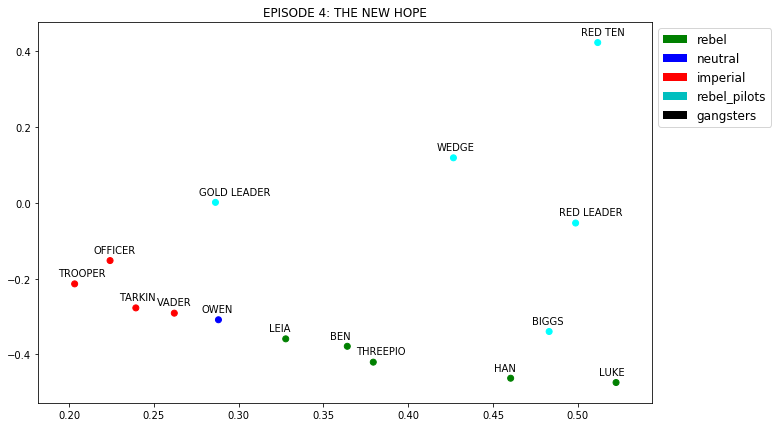

In [112]:
k=15
plt.figure(figsize=(11,7))
my_colors={"rebel":"green", "neutral": 'blue', "imperial":'red', "rebel_pilots":'cyan', 'gangsters':'black'}

plt.scatter(X_2["0"][:k], X_2["1"][:k], c=[my_colors[side] for side in X_2['side'][:k]])

names=X_2.index[:k]
for i, name in enumerate(names):
    plt.annotate(name, (X_2["0"][i]-0.01, X_2["1"][i]+0.02))
    
plt.title("EPISODE 4: THE NEW HOPE")

#plt.legend(colors, bbox_to_anchor=(1, 1), fontsize=12)

recs = []
for i in range(5):
    recs.append(mpatches.Rectangle((1,1),0,0, fc=["g", 'b', 'r', 'c', 'black'][i]))
plt.legend(recs, [z for z in my_colors.keys()], bbox_to_anchor=(1, 1), fontsize=12)

## Force awakens

In [154]:
df=pd.read_csv('force awakens.csv').iloc[:,1:]
#df.columns=['character', 'words']

In [155]:
characters=set(df.character)

replics = pd.DataFrame(columns=("character", "words"))

for ch in characters:
    x =' '.join(df[df.character==ch].words)    
    replics=replics.append({"character":ch, "words":x}, ignore_index=True )

In [156]:
tfidf_vec = TfidfVectorizer(stop_words='english')
features = tfidf_vec.fit_transform(replics.words)
X = pd.DataFrame(data=features.toarray(), 
                 index=replics.character, 
                 columns=tfidf_vec.get_feature_names())
X.sample(10)

2187       3po        47      able    aboard    access  \
character                                                                    
GENERAL HUX     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
REY             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
FINN            0.000000  0.000000  0.033198  0.000000  0.000000  0.033198   
POE             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
KYLO REN        0.000000  0.000000  0.000000  0.066184  0.000000  0.000000   
MAZ             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
LEIA            0.000000  0.113353  0.000000  0.000000  0.000000  0.000000   
CAPTAIN PHASMA  0.309615  0.000000  0.000000  0.000000  0.000000  0.000000   
HAN             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
SNOKE           0.000000  0.000000  0.000000  0.000000  0.166758  0.000000   

                accusing  acquiesces  acquired  actually  ...     worry  \
character                                                 ...             
GENERAL HUX     0.000000    0.076123  0.000000  0.000000  ...  0.000000   
REY             0.000000    0.000000  0.000000  0.043684  ...  0.000000   
FINN            0.033198    0.000000  0.000000  0.000000  ...  0.000000   
POE             0.000000    0.000000  0.000000  0.000000  ...  0.000000   
KYLO REN        0.000000    0.000000  0.000000  0.000000  ...  0.000000   
MAZ             0.000000    0.000000  0.000000  0.000000  ...  0.000000   
LEIA            0.000000    0.000000  0.000000  0.000000  ...  0.000000   
CAPTAIN PHASMA  0.000000    0.000000  0.000000  0.000000  ...  0.000000   
HAN             0.000000    0.000000  0.036084  0.000000  ...  0.036084   
SNOKE           0.000000    0.000000  0.000000  0.000000  ...  0.000000   

                  wouldn       wow  wreckage    wrench        ya     yanks  \
character                                                                    
GENERAL HUX     0.000000  0.000000  0.076123  0.000000  0.000000  0.000000   
REY             0.037135  0.000000  0.000000  0.043684  0.000000  0.000000   
FINN            0.000000  0.000000  0.000000  0.000000  0.000000  0.033198   
POE             0.000000  0.000000  0.000000  0.000000  0.046968  0.000000   
KYLO REN        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
MAZ             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
LEIA            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CAPTAIN PHASMA  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
HAN             0.061349  0.036084  0.000000  0.000000  0.030675  0.000000   
SNOKE           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                    yeah     years       yes  
character                                     
GENERAL HUX     0.000000  0.000000  0.090407  
REY             0.115540  0.037135  0.025940  
FINN            0.153661  0.000000  0.039427  
POE             0.073066  0.000000  0.000000  
KYLO REN        0.000000  0.000000  0.039302  
MAZ             0.000000  0.000000  0.000000  
LEIA            0.000000  0.000000  0.000000  
CAPTAIN PHASMA  0.000000  0.000000  0.000000  
HAN             0.023860  0.030675  0.042855  
SNOKE           0.000000  0.000000  0.000000  

[10 rows x 987 columns]

In [157]:
svd = TruncatedSVD(n_components = 2)
svdMatrix = svd.fit_transform(X)

In [158]:
X_2 = pd.DataFrame(data=svdMatrix, 
                 index=replics.character, columns=['0', '1'])

In [159]:
X_2

0         1
character                         
GENERAL HUX     0.234745  0.695551
CAPTAIN PHASMA  0.068589  0.095222
SNOKE           0.285878  0.580735
HAN             0.663894 -0.106231
MAZ             0.458399 -0.074860
REY             0.669909 -0.193441
LEIA            0.465280  0.086289
FINN            0.728122 -0.257564
POE             0.539702 -0.290304
KYLO REN        0.550818  0.367942

In [160]:
rebels=['REY', 'FINN', 'POE', 'HAN', 'LEIA', 'MAZ']
first_order=['GENERAL HUX', 'KYLO REN', 'CAPTAIN PHASMA', 'SNOKE']

In [161]:
side={}
for character in rebels:
    side[character]= 'rebel'
for character in first_order:
    side[character]='first_order' 

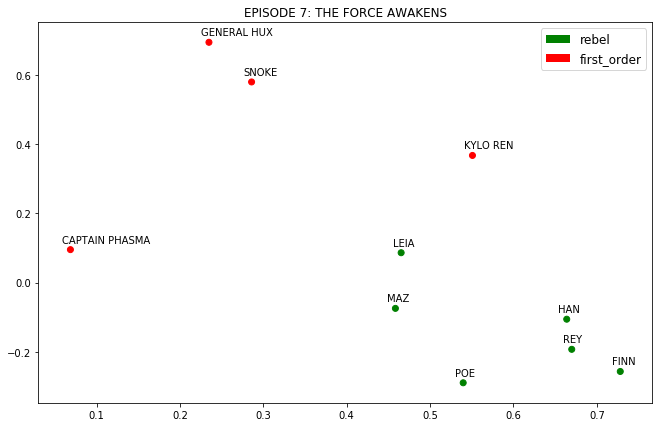

In [162]:
plt.figure(figsize=(11,7))

my_colors={"rebel":"green", "first_order":'red'}

plt.scatter(X_2["0"], X_2["1"], c=[my_colors[side[character]] for character in characters])

names=X_2.index
for i, name in enumerate(names):
    plt.annotate(name, (X_2["0"][i]-0.01, X_2["1"][i]+0.02))
    
plt.title("EPISODE 7: THE FORCE AWAKENS")

recs = []
for i in range(2):
    recs.append(mpatches.Rectangle((1,1),0,0, fc=["g", 'r'][i]))
plt.legend(recs, [z for z in my_colors.keys()], bbox_to_anchor=(1, 1), fontsize=12)

## Sentiment analysis of characters

In [46]:
import nltk
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
import os

# Change the path according to your system
stanford_classifier = 'stanford-ner-2017-06-09/classifiers/english.all.3class.distsim.crf.ser.gz'
stanford_ner_path = 'stanford-ner-2017-06-09/stanford-ner.jar'
nltk.internals.config_java("C:/Program Files (x86)/Java/jre1.8.0_151/bin/javaw.exe")
os.environ['JAVAHOME']="C:/Program Files (x86)/Java/jre1.8.0_151/bin/javaw.exe"

os.environ['CLASSPATH'] = "stanford-parser-full-2018-02-27/stanford-parser-full-2018-02-27/jar-files"


# Creating Tagger Object
st = StanfordNERTagger(stanford_classifier, stanford_ner_path, encoding='utf-8')

In [47]:
### ADD POS
import os
os.environ['CLASSPATH'] = "stanford-postagger-2015-12-09/jar-files"
stanford_pos_classifier = 'stanford-postagger-2015-12-09/models/english-bidirectional-distsim.tagger'
#stanford_pos_path = 'stanford-ner-2017-06-09/stanford-ner.jar'

from nltk.tag.stanford import StanfordPOSTagger
st = StanfordPOSTagger(stanford_pos_classifier, stanford_ner_path, encoding='utf-8')

In [48]:
senti=pd.read_csv('senti.csv', header=None)
senti=senti.set_index(0)

In [49]:
#lemmatize the words
from nltk.stem.wordnet import WordNetLemmatizer

lemma=[]
for i in range(df.shape[0]):
    l=[]
    words=df.loc[i, 'words'].replace('.','').split(" ")
    for j in range(len(words)):
        word=words[j].lower()
        if words[j].startswith('VB'):
            l.extend([WordNetLemmatizer().lemmatize(word, 'v')])
        elif words[j].startswith('NN'):
            l.extend([WordNetLemmatizer().lemmatize(word, 'n')])
        else: l.extend([word])
    lemma.append(l)
df['lemma']=pd.Series(lemma)

In [50]:
#delete all ''
df['lemma']=pd.Series([[x for x in y if x!=''] for y in df.lemma], index=df.index)
#delete '?', '!', ','
for sign in ['?', '!', ',']:
    df['lemma']=pd.Series([[x.replace(sign, '') for x in y] for y in df.lemma], index=df.index)


In [51]:
def find_score(x):
    try:
        if type(senti.loc[x])==pd.DataFrame: 
            return np.float(np.mean(senti.loc[x]))
        else: return np.float(senti.loc[x])
    except: return 0

In [50]:
#first time calculation
# df['senti']=pd.Series([[find_score(w.lower()) for w in df['lemma'][i]] for i in range (df.shape[0])])
# df['pos']=pd.Series([[x[1] for x in st.tag(df.loc[i, 'lemma'])] for i in range(df.shape[0])])
#df['pos']=pd.Series([[x[1] for x in st.tag(df.loc[i, 'lemma'])] for i in range(df.shape[0])])


In [163]:
# after the fields are calculated
df['pos']=pd.Series([eval(x) for x in df['pos']], index=df.index)
df['senti']=pd.Series([eval(x) for x in df['senti']], index=df.index)
df['lemma']=pd.Series([eval(x) for x in df['lemma']], index=df.index)

In [164]:
# align the length
df['senti']=pd.Series([df.loc[ind, 'senti'][:len(df.loc[ind, 'lemma'])] for ind in df.index], index=df.index)
df['pos']=pd.Series([df.loc[ind, 'pos'][:len(df.loc[ind, 'lemma'])] for ind in df.index], index=df.index)

In [165]:
## calculate sentiment of the characters
exclude=['hux', 'rey', 'leia', 'maz', 'han', 'solo', 'poe',
       'ben', 'chewie', 'kylo', 'snoke', 'finn', 'bb-8', 'phasma', 'supreme', 'leader', 'snoke', 'be', 'see', 'resistance',
        'first', 'order']

In [166]:
characters_senti={}

In [167]:
for x in characters:
    df_char=df[df.character==x]
    char_senti=[df_char.loc[i, 'senti'][j] for i in df_char.index 
            for j in range(len(df_char.loc[i, 'senti'])) if (df_char.loc[i, 'pos'][j] in ['JJ','JJR', 'NN', 'NNS', 'NNP'])&
               (df_char.loc[i, 'lemma'][j] not in exclude)]
    char_lemma=[df_char.loc[i, 'lemma'][j] for i in df_char.index 
            for j in range(len(df_char.loc[i, 'lemma'])) if (df_char.loc[i, 'pos'][j] in ['JJ', 'JJR','NN', 'NNS', 'NNP'])&
               (df_char.loc[i, 'lemma'][j] not in exclude)]
    char_freq=[(x, find_score(x), char_lemma.count(x)) for x in set(char_lemma)]
    char_freq.sort(key = lambda x: x[2])  
    char_freq=char_freq[::-1]
    top_words=[x for x in char_freq if (x[1]!=0)&(x[0] not in exclude)][:10]

    char_senti=[x for x in char_senti if x not in exclude]
    characters_senti[x]={'mean': np.mean(char_senti), 'top words': top_words}

In [64]:
np.median([x['mean']*100 for x in characters_senti.values()])

4.6330743230789855

In [65]:
order=np.argsort([values['mean'] for values in characters_senti.values()])[::-1]

In [66]:
table=pd.DataFrame([[x[0] for x in top_words] 
                    for top_words in [values['top words'] for values in [list(characters_senti.values())[i] for i in order]]], 
             index=[list(characters_senti.keys())[i] for i in order])

In [67]:
colors=pd.DataFrame([[x[1] for x in top_words] for top_words in [values['top words'] for values in characters_senti.values()]], 
             index=list(characters_senti.keys()))

In [68]:
rel_min=np.nanmin([colors.iloc[i,j] for i in range(colors.shape[0]) for j in range(colors.shape[1])])
rel_max=np.nanmax([colors.iloc[i,j] for i in range(colors.shape[0]) for j in range(colors.shape[1])])
rel_med=np.nanmedian([colors.iloc[i,j] for i in range(colors.shape[0]) for j in range(colors.shape[1])])

In [69]:
def return_color(value):
    value=find_score(value)
    if value<=rel_med:
                cell_color=rgb2hex(int(70+180*(value-rel_min)/(rel_med-rel_min)), 0, 0)
    else:
                cell_color=rgb2hex(int(220-200*(value-rel_med)/(rel_max-rel_med)), 
                                   int(250-120*(value-rel_med)/(rel_max-rel_med)), 0)
    return 'background-color: %s' % cell_color

In [70]:
rel_max_total=np.max([x['mean']*100 for x in characters_senti.values()])
rel_med_total=np.median([x['mean']*100 for x in characters_senti.values()])
rel_min_total=np.min([x['mean']*100 for x in characters_senti.values()])
def return_total_color(value):
    if value<=rel_med_total:
                cell_color=rgb2hex(int(70+180*(value-rel_min_total)/(rel_med_total-rel_min_total)), 0, 0)
    else:
                cell_color=rgb2hex(int(220-200*(value-rel_med_total)/(rel_max_total-rel_med_total)), 
                                   int(250-120*(value-rel_med_total)/(rel_max_total-rel_med_total)), 0)
    return 'background-color: %s' % cell_color

In [71]:
def return_side_color(value):
    if value in ['rebel', 'rebel_pilots']:
            cell_color='green'
    elif value=='first_order':    
             cell_color='red'
    elif value=='neutral':
            cell_color='cyan'
#     elif value=='imperial':    
#             cell_color='red'
#     elif value=='gangsters':    
#             cell_color='grey'
    return 'background-color: %s' % cell_color

In [72]:
table_final=pd.concat([pd.Series([side[x] for x in table.index], index=table.index, name='side'), 
                 pd.Series([characters_senti[x]['mean']*100 for x in table.index], index=table.index, name='sentiment score'),
                 table], axis=1)

In [73]:
table_final.style.applymap(return_side_color, subset=['side']).applymap(return_total_color, subset=['sentiment score']).applymap(return_color, subset=list(table_final.columns[2:]))

### Relations between characters
##### Calculation is based on sentiment scores of adjectives and nouns

In [168]:
character_relations={}
for key in characters:
    character_relations[key]={}

In [169]:
for x in characters:
    for y in np.unique(df[df.character==x]['2nd character']):
        if y!='OTHER':
            if x in character_relations[y].keys():
                    continue
            else:
                df_char=df[(df.character==x)&(df['2nd character']==y)]
                df_char=df_char.append(df[(df.character==y)&(df['2nd character']==x)])

                char_senti=[df_char.loc[i, 'senti'][j] for i in df_char.index 
                        for j in range(len(df_char.loc[i, 'senti'])) if df_char.loc[i, 'pos'][j] in ['JJ','JJR', 'NN', 'NNS', 'NNP']]
                char_lemma=[df_char.loc[i, 'lemma'][j] for i in df_char.index 
                        for j in range(len(df_char.loc[i, 'lemma'])) if df_char.loc[i, 'pos'][j] in ['JJ','JJR', 'NN', 'NNS', 'NNP']]
                char_freq=[(x, find_score(x), char_lemma.count(x)) for x in set(char_lemma)]
                char_freq.sort(key = lambda x: x[2])  
                char_freq=char_freq[::-1]
                top_words=[x for x in char_freq if (x[1]!=0)&(x[0] not in exclude)][:15]

                char_senti=[x for x in char_senti if x not in exclude]

                character_relations[x][y]={'mean': np.mean(char_senti), 'num words': len([x for y in df_char['lemma'] for x in y])}
                #character_relations[y][x]={'mean': np.mean(char_senti), 'num words': len([x for y in df_char['lemma'] for x in y]), 'top words': top_words}

In [173]:
character_relations['HAN']

{'FINN': {'mean': 0.03322059343434343, 'num words': 920},
 'KYLO REN': {'mean': 0.034864400311526475, 'num words': 341},
 'LEIA': {'mean': 0.06950557077625572, 'num words': 345},
 'MAZ': {'mean': 0.046806574074074084, 'num words': 103},
 'REY': {'mean': 0.06799114321608041, 'num words': 682}}

In [174]:
nodes=[]
for node in characters:
    nodes.append({'group': side[node], 'name': node})

In [175]:
links=[]
for i, node in enumerate(characters):
    node_arcs=[]
    for j, node_2 in enumerate(list(characters)):
        try:
            if (i!=j)&(character_relations[node][node_2]['num words']>50):
                links.append({'source': i, 'target': j, 'value':character_relations[node][node_2]['num words'],
                             'relation':character_relations[node][node_2]['mean']})
        except:
                continue

#### Create Bokeh chord chart

In [209]:
nodes_df = pd.DataFrame(nodes)
links_df = pd.DataFrame(links)

In [210]:
links_dfs=links_df
links_dfs['source']=pd.Series([nodes_df.loc[i, 'name'] for i in list(links_dfs['source'])], index=links_dfs.index)
links_dfs['target']=pd.Series([nodes_df.loc[i, 'name'] for i in list(links_dfs['target'])], index=links_dfs.index)
links_dfs.head(5)

source    target  value  relation
0     GENERAL HUX     SNOKE    196  0.011957
1     GENERAL HUX  KYLO REN    153  0.019531
2  CAPTAIN PHASMA      FINN     92 -0.022995
3           SNOKE  KYLO REN    131  0.023381
4             HAN       MAZ    103  0.046807

In [81]:
# #remove duplicates
# remove=[]
# for i, x in enumerate(links[:]):
#     for j, y in enumerate(links[:i]):
#         if (links[j]['source']==links[i]['target'])&(links[i]['source']==links[j]['target']):
#             remove.append(x)
# links=[x for x in links if x not in remove]

In [132]:
# def return_color(value):
#     if value<=rel_med:
#         return rgb2hex(int(70+180*(value-rel_min)/(rel_med-rel_min)), 0, 0)
#     else:
#         return rgb2hex(int(220-200*(value-rel_med)/(rel_max-rel_med)), 
#                                    int(250-120*(value-rel_med)/(rel_max-rel_med)), 0)

In [217]:
nodes_df['index']=pd.Series(range(nodes_df.shape[0]))
nodes_df['index']=nodes_df['index'].astype('str')

In [225]:
#node_remove=[x for x in list(nodes_df.index) if x not in list(links_df.source)+list(links_df.target)]
#nodes_df.drop(node_remove, inplace=True)
nodes_hdf=hv.Dataset(pd.DataFrame(nodes_df), 'name')
chord = hv.Chord((links_dfs, nodes_hdf))

In [204]:
# create color scheme for the relations
rel_min=np.min(list(links_df['relation']))
rel_max=np.max(list(links_df['relation']))
rel_med=np.median(list(links_df['relation']))

def return_color(value):
    if value<=0:
        return rgb2hex(int(100+150*(value-rel_min)/(rel_med-rel_min)), 0, 0)
    else:
        return rgb2hex(int(255-200*(value)/(rel_max)), 
                                    int(255-120*(value)/(rel_max)), 0)

In [205]:
# color nodes
greens=[rgb2hex(40*i, 100+i*30,20*i) for i in range(6)]
reds=[rgb2hex(40+i*60, 25*i, 25*i) for i in range(4)]

cmap=[]
i=0
j=0
for x in nodes_df.index:
    if nodes_df.loc[x, 'group']=='rebel':
        cmap.append(greens[i])
        i+=1
    else: 
        cmap.append(reds[j])
        j+=1

In [231]:
chord.opts(
    opts.Chord(cmap=cmap, edge_cmap=[return_color(x['relation']) for x in links], 
               edge_color=dim('value').str(), 
               labels='name', node_color=dim('name').str()))

:Chord   [source,target]   (value,relation)

### Sentiment calculation based on pre-trained model

In [136]:
embed_size=300

embeddings_index = {}

In [137]:
f = open('movie sentiment/glove.840B.300d.txt', encoding="utf8")

In [ ]:
values=[]

for line in f:   
    values.append(line)
f.close()

W = np.zeros((len(values), embed_size))
words = []

for i, line in enumerate(values):
    try:
        word, numbers = line.split(maxsplit=1)
        words.append(word)
        W[i] = np.fromstring(numbers, dtype=np.float32, sep=" ")
    except:
        continue


embeddings_index=dict(zip(words, W))

embeddings_index['potato'][:10]

In [ ]:
from tqdm import tqdm

In [ ]:
import keras 

from keras.models import model_from_json

def save_model(model,name):
    '''
    save model architecture and model weights
    '''
    json_string = model.to_json()
    open(name+'_architecture.json', 'w').write(json_string)
    model.save_weights(name+'_weights.h5')
    
def load_model(name):
    model = model_from_json(open(name+'_architecture.json').read())
    model.load_weights(name + '_weights.h5')
    return(model)

In [ ]:
max_len=53

In [ ]:
def text_to_array(text):
    empty = np.zeros(embed_size)
    text = text[:max_len]
    embeddings = [embeddings_index.get(x, empty) for x in text]
    # add the remaining zero embeddings
    embeddings+= [empty] * (max_len - len(embeddings))
    return np.array(embeddings)

In [23]:
test_vects = np.array([text_to_array(X_text) for X_text in tqdm(df['lemma'])])

100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [00:06<00:00, 97.00it/s]


In [22]:
model=load_model("movie sentiment/model glove")

In [24]:
y_test=model.predict(test_vects,verbose=1)
y_test=[np.argmax(x) for x in y_test]

624/624 [==============================] - ETA: 14 - ETA: 4 - ETA:  - ETA: 11 - ETA: 7 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 5s 8ms/step


In [25]:
df['glove']=pd.Series(y_test, index=df.index)

In [26]:
df.to_csv('force awakens.csv')

In [27]:
character_relations={}
for key in characters:
    character_relations[key]={}

In [28]:
for x in characters:
    for y in np.unique(df[df.character==x]['2nd character']):
        if y!='OTHER':
            if x in character_relations[y].keys():
                    continue
            else:
                df_char=df[(df.character==x)&(df['2nd character']==y)]
                df_char=df_char.append(df[(df.character==y)&(df['2nd character']==x)])

                char_senti=df_char['glove'] 

                character_relations[x][y]={'mean': np.mean(df_char['glove']), 'num words': len([x for y in df_char['lemma'] for x in y])}
            #    character_relations[y][x]={'mean': np.mean(df_char['glove']), 'num words': len([x for y in df_char['lemma'] for x in y]), 'top words': top_words}

In [29]:
nodes=[]
for node in characters:
    nodes.append({'group': side[node], 'name': node})

In [30]:
links=[]
for i, node in enumerate(characters):
    node_arcs=[]
    for j, node_2 in enumerate(list(characters)):
        try:
            if character_relations[node][node_2]['num words']>50:
                links.append({'source': i, 'target': j, 'value':character_relations[node][node_2]['num words'],
                             'relation':character_relations[node][node_2]['mean']})
        except:
                continue

In [52]:
rel_min=np.min([x['relation'] for x in links])
rel_max=np.max([x['relation'] for x in links])
rel_med=np.median([x['relation'] for x in links])

def return_color(value):
    if value<=rel_med:
        return rgb2hex(int(100+150*(value-rel_min)/(rel_med-rel_min)), 0, 0)
    else:
        return rgb2hex(int(255-200*(value)/(rel_max)), 
                                    int(255-120*(value)/(rel_max)), 0)

In [38]:
nodes_df = pd.DataFrame(nodes)
links_df = pd.DataFrame(links)

In [35]:
links_dfs=links_df
links_dfs['source']=pd.Series([nodes_df.loc[i, 'name'] for i in list(links_dfs['source'])], index=links_dfs.index)
links_dfs['target']=pd.Series([nodes_df.loc[i, 'name'] for i in list(links_dfs['target'])], index=links_dfs.index)

In [39]:
nodes_hdf=hv.Dataset(pd.DataFrame(nodes_df), 'index')
chord = hv.Chord((links_df, nodes_hdf))

In [41]:
greens=[rgb2hex(40*i, 100+i*30,20*i) for i in range(6)]
reds=[rgb2hex(50+i*60, 25*i, 25*i) for i in range(4)]

In [42]:
cmap=[]
i=0
j=0
for x in nodes_df.index:
    if nodes_df.loc[x, 'group']=='rebel':
        cmap.append(greens[i])
        i+=1
    else: 
        cmap.append(reds[j])
        j+=1

In [43]:
links_dfs

source          target  value  relation
0          FINN  CAPTAIN PHASMA     92  1.666667
1          FINN             MAZ    226  1.857143
2          FINN             HAN    920  1.740741
3          FINN        KYLO REN    151  1.500000
4          FINN            LEIA    122  1.714286
5          FINN             REY   1625  1.750000
6          FINN             POE    447  1.829787
7   GENERAL HUX        KYLO REN    153  1.800000
8   GENERAL HUX           SNOKE    196  2.083333
9           MAZ             HAN    103  1.909091
10          MAZ             REY    199  2.090909
11          HAN        KYLO REN    341  1.357143
12          HAN            LEIA    345  1.633333
13          HAN             REY    682  1.805970
14     KYLO REN             REY    268  1.875000
15     KYLO REN             POE    110  1.700000
16     KYLO REN           SNOKE    131  2.166667

In [53]:
chord.opts(
    opts.Chord(cmap=cmap, edge_cmap=[return_color(x['relation']) for x in links], 
               edge_color=dim('value').str(), 
               labels='name', node_color=dim('index').str()))

:Chord   [source,target]   (value,relation)

## Last Jedi

In [232]:
df_lj=pd.read_csv('last_jedi.csv').iloc[:,1:]
df_lj.columns=['character', 'words']

In [233]:
characters=set(df_lj.character)

In [234]:
characters

{'CAPTAIN PHASMA',
 "D'ACY",
 'FINN',
 'GENERAL HUX',
 'HOLDO',
 'KYLO REN',
 'LEIA',
 'LUKE',
 'POE',
 'REY',
 'SNOKE'}

In [235]:
replics = pd.DataFrame(columns=("character", "words"))

for ch in characters:
    x =' '.join(df_lj[df_lj.character==ch].words)    
    replics=replics.append({"character":ch, "words":x}, ignore_index=True )

In [236]:
features = tfidf_vec.fit_transform(replics.words)
X = pd.DataFrame(data=features.toarray(), 
                 index=replics.character, 
                 columns=tfidf_vec.get_feature_names())

svd = TruncatedSVD(n_components = 2)
svdMatrix = svd.fit_transform(X)

X_2 = pd.DataFrame(data=svdMatrix, 
                 index=replics.character, columns=['0', '1'])

In [243]:
rebel = ['REY', 'FINN', 'POE', 'HAN', 'LEIA', 'HOLDO', "D'ACY", 'MAZ', 'LUKE']
first_order = ['GENERAL HUX', 'KYLO REN', 'CAPTAIN PHASMA', 'SNOKE']
               
side={}
for character in rebel:
    side[character]= 'rebel'
for character in first_order:
    side[character]='first_order' 

Text(0.5, 1.0, 'EPISODE 8: THE LAST JEDI')

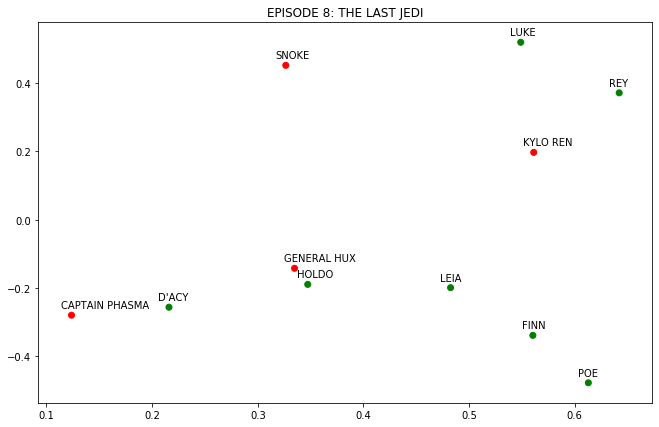

In [244]:
plt.figure(figsize=(11,7))

my_colors={"rebel":"green", "first_order":'red'}
plt.scatter(X_2["0"], X_2["1"], c=[my_colors[side[character]] for character in characters])

names=X_2.index
for i, name in enumerate(names):
    plt.annotate(name, (X_2["0"][i]-0.01, X_2["1"][i]+0.02))
    
plt.title("EPISODE 8: THE LAST JEDI")